

# Lab | Customer Analysis Round 2
For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same df file. Please save the code, so that you can re-use it later in the labs following this lab.

* Dealing with the df
* Show the dfframe shape.
* Standardize header names.
* Which columns are numerical?
* Which columns are categorical?
* Check and deal with NaN values.
* Datetime format - Extract the months from the dfset and store in a separate column. Then filter the df to show only the information for the first quarter , ie. January, February and March. Hint: If df from March does not exist, consider only January and February.
* BONUS: Put all the previously mentioned df transformations into a function.


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [6]:
# read the dfset
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

# Discovering the dataset

In [7]:
display(df)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [8]:
df.shape

(10910, 26)

In [9]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [12]:
# Remove Column 'Unnamed: 0'

df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
display(df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [14]:
#Standarize Column Names - Lower the letters. 

df.columns = df.columns.str.lower()

In [15]:
display(df)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [16]:
# Which columns are numerical?

df._get_numeric_data().columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [17]:
#  Which columns are categorical?
num_cols = df._get_numeric_data().columns
cols = df.columns
list(set(cols) - set(num_cols))

['vehicle size',
 'sales channel',
 'policy type',
 'vehicle type',
 'customer',
 'vehicle class',
 'renew offer type',
 'education',
 'state',
 'gender',
 'coverage',
 'response',
 'employmentstatus',
 'marital status',
 'location code',
 'effective to date',
 'policy']

# Check NaN values.

In [18]:
# Check columns wiht NAM
df.isna().sum().sort_values(ascending=False)

vehicle type                     5482
number of open complaints         633
months since last claim           633
response                          631
state                             631
vehicle size                      622
vehicle class                     622
months since policy inception       0
total claim amount                  0
sales channel                       0
renew offer type                    0
policy                              0
policy type                         0
number of policies                  0
customer                            0
marital status                      0
location code                       0
income                              0
gender                              0
employmentstatus                    0
effective to date                   0
education                           0
coverage                            0
customer lifetime value             0
monthly premium auto                0
dtype: int64

## deal with NaN values.

In [21]:
df.fillna(0, inplace=True)

In [20]:
df.isna().sum().sort_values(ascending=False)

customer                         0
months since last claim          0
vehicle size                     0
vehicle class                    0
total claim amount               0
sales channel                    0
renew offer type                 0
policy                           0
policy type                      0
number of policies               0
number of open complaints        0
months since policy inception    0
monthly premium auto             0
state                            0
marital status                   0
location code                    0
income                           0
gender                           0
employmentstatus                 0
effective to date                0
education                        0
coverage                         0
response                         0
customer lifetime value          0
vehicle type                     0
dtype: int64

# Datetime format - Extract the months from the dfset and store in a separate column. Then filter the df to show only the information for the first quarter , ie. January, February and March. Hint: If df from March does not exist, consider only January and February.

In [30]:
#Convert to Pandas DateTime The column "Effective to Date"
df['effective to date'] = pd.to_datetime(df['effective to date'])

In [35]:
#Check Dtype of the column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

In [44]:
#Create column with month
df['month'] = df['effective to date'].dt.month

In [47]:
# Show only the information from first quarter

df.loc[(df['month'] == 1) | (df['month'] == 2) | (df['month'] == 3)]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,0,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,0,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,0,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## BONUS: Put all the previously mentioned df transformations into a function.

In [143]:
# Load the DF
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [144]:
def df_trans(df):
    """This function will perform a few transformations on the dataset"""
    
    #Drop column
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    
    #Standarize Column Names - Lower the letters. 
    df.columns = df.columns.str.lower()
    
    #Print Numerical and Categorical Columns 
    numerical = df._get_numeric_data().columns
    cols = df.columns
    categorical = list(set(cols) - set(numerical))
    print(f'The numerical columns are: {numerical}')
    print(f'The categorical columns are: {categorical}')

    #Deal with NANs
    df['income'].fillna(df['income'].median(), inplace=True)
    df.fillna(0, inplace=True)

    #Transform the column df['effective to date'] to date time
    df['effective to date'] = pd.to_datetime(df['effective to date'])

    #Create column with month
    df['month'] = df['effective to date'].dt.month

    # Return the cleand DF with the first the quater of data

    return df




In [10]:
# Test the Function
df_trans(df)

The numerical columns are: Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')
The categorical columns are: ['renew offer type', 'sales channel', 'location code', 'state', 'coverage', 'effective to date', 'customer', 'response', 'marital status', 'education', 'employmentstatus', 'vehicle size', 'policy', 'vehicle class', 'gender', 'policy type']


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


# lab-customer-analysis-round-3

## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
* Show DataFrame info.
* Describe DataFrame.
* Show a plot of the total number of responses.
* Show a plot of the response rate by the sales channel.
* Show a plot of the response rate by the total claim amount.
* Show a plot of the response rate by income.

In [30]:
# import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [151]:
#Read CSV

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [152]:
#Clean the file and deal with NAMS. Using the Function created in the previous excercice. 

df = df_trans(df)

The numerical columns are: Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')
The categorical columns are: ['effective to date', 'education', 'customer', 'vehicle size', 'policy type', 'gender', 'employmentstatus', 'renew offer type', 'policy', 'marital status', 'vehicle class', 'coverage', 'sales channel', 'state', 'response', 'location code']


In [9]:
#Display DataFrame
display(df)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [13]:
## Show DataFrame info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

## Describe DataFrame.

In [10]:
#Describe Numerical
df.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [11]:
#Describe all
df.describe(include='all')

C:\Users\ssai\AppData\Local\Temp\ipykernel_10284\1362201412.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,month
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,3,9,4,4,NaN,6,3,NaN
top,BU79786,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,...,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,NaN
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-28 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,1.463762
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN,0.498712
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,1.000000
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,1.000000


# Plots

In [31]:
#Define style for plotting

# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None

In [32]:
#Run Function to set style for following plots. 
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_10284\2411945222.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [50]:
# Add labels to barplots and line plots
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.4f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   

## Show a plot of the total number of responses.

In [33]:
df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

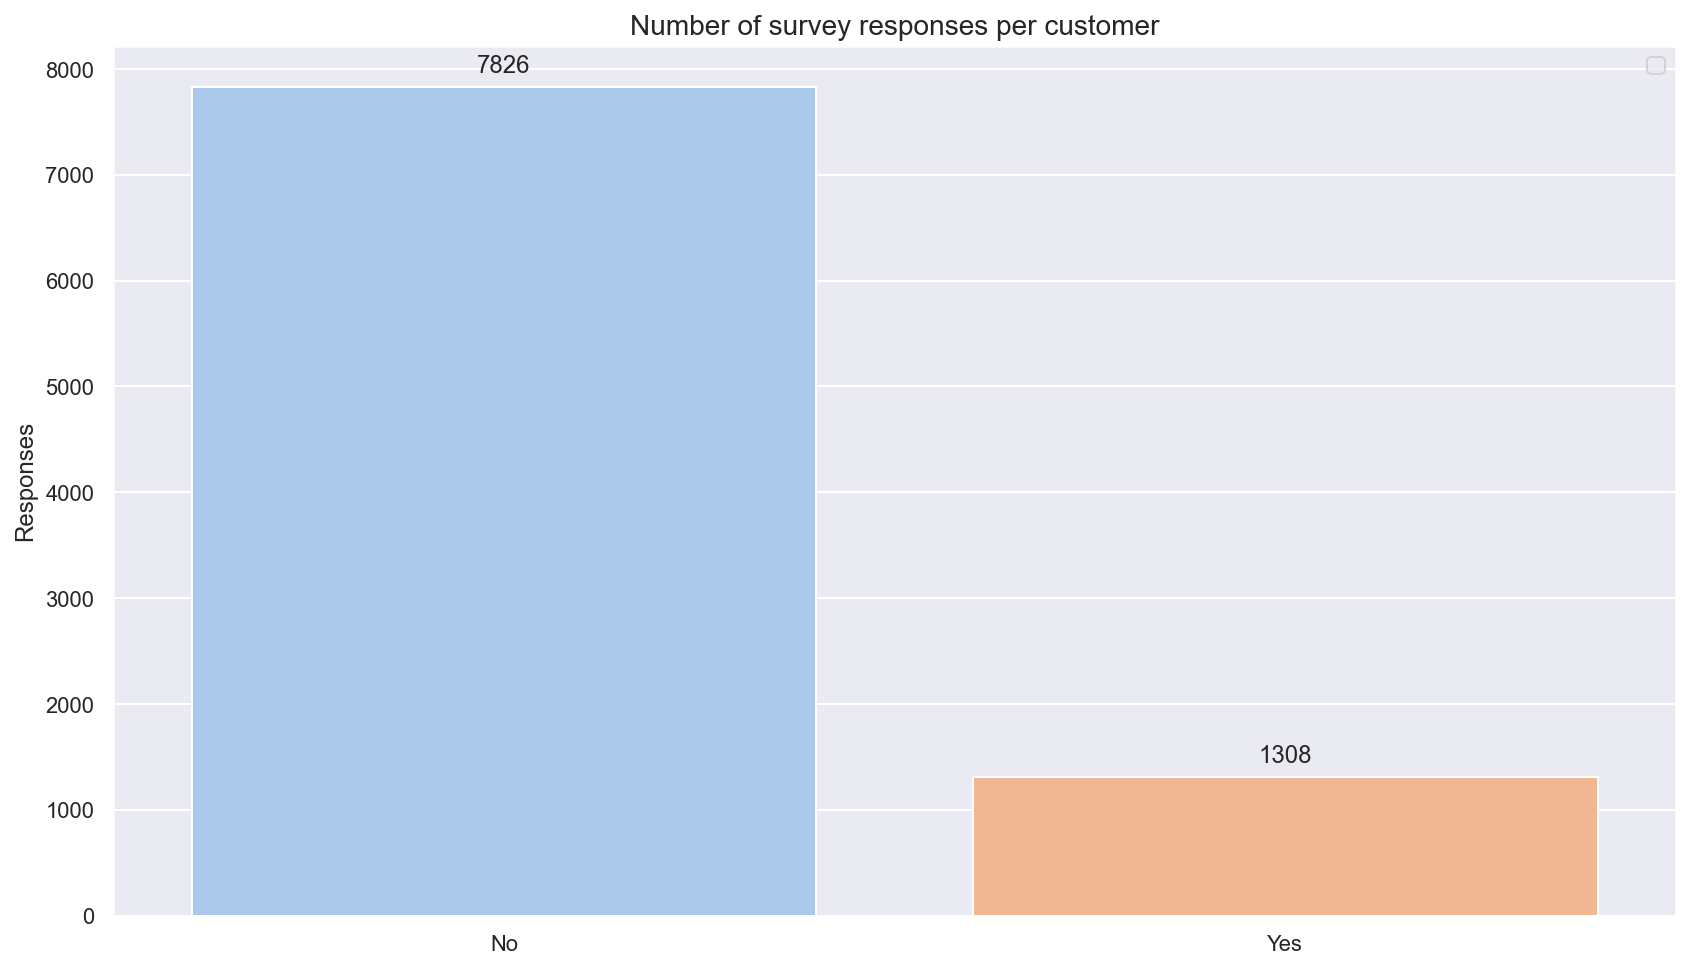

In [53]:
#Create data for being plotted
ax = sns.barplot(x=df['response'].value_counts().index, y=df['response'].value_counts())
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the Y axis
ax.set_ylabel('Responses')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Total Number of Surveys<', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()

# Show a plot of the response rate by the sales channel.

In [72]:
#Table to be plot
df.groupby(df['sales channel'])['response'].count()

sales channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: response, dtype: int64

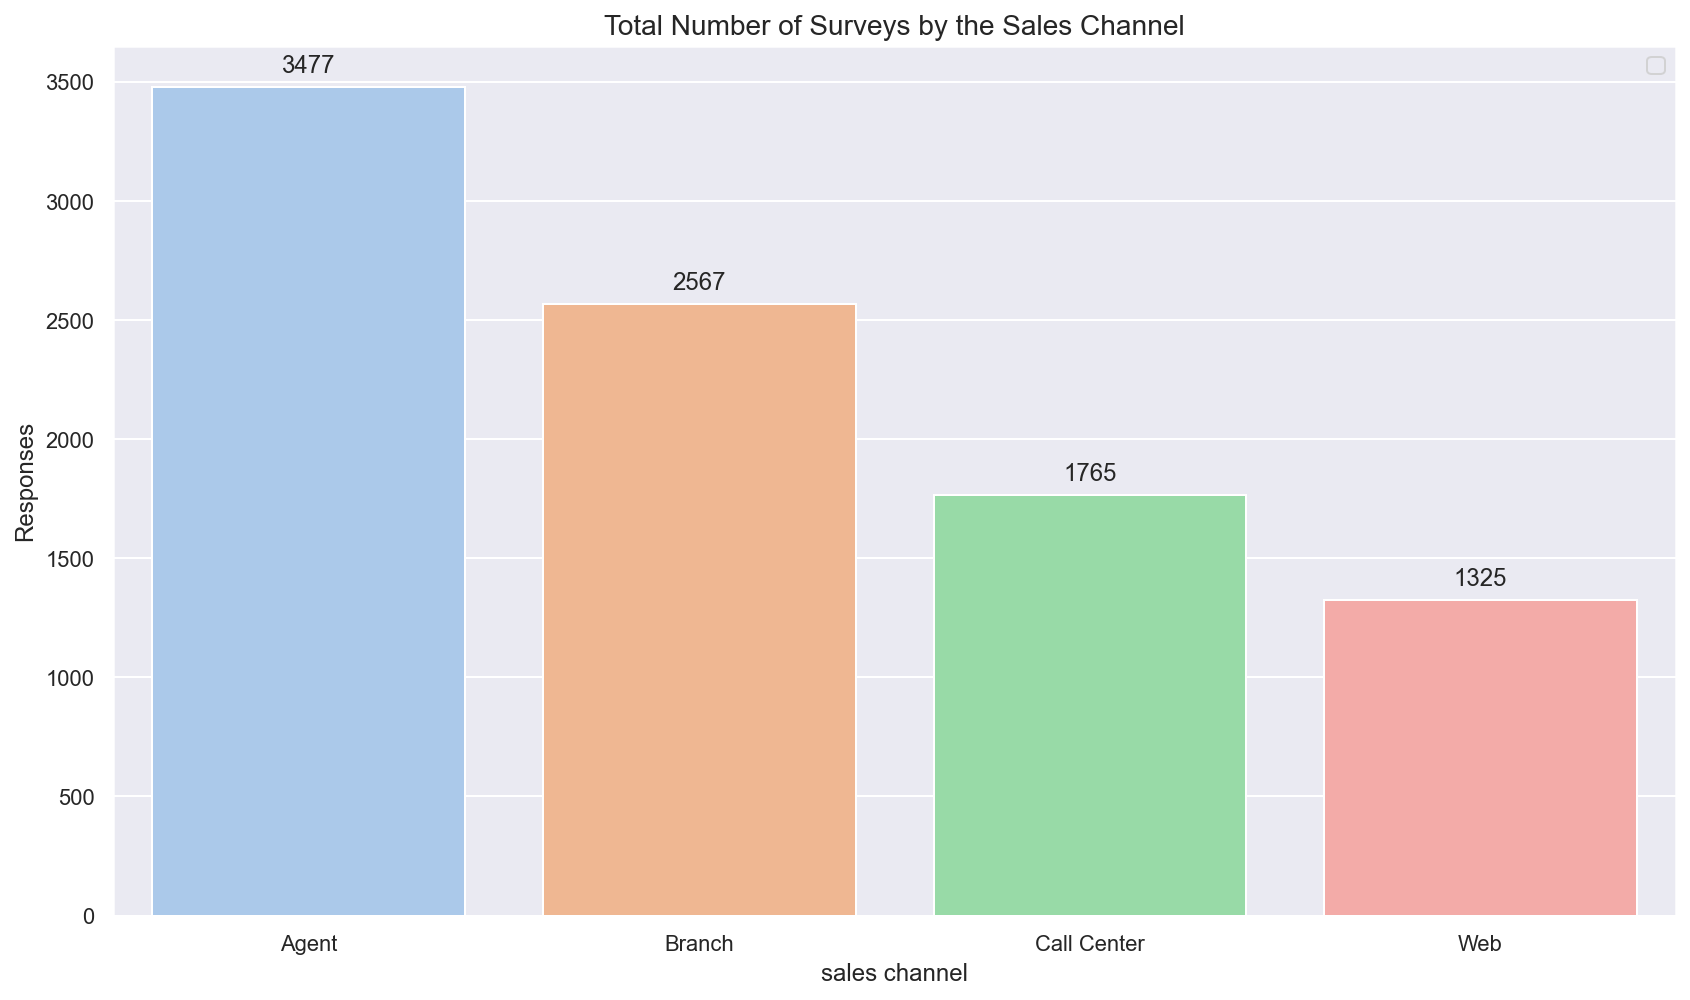

In [73]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df.groupby(df['sales channel'])['response'].count().index, y=df.groupby(df['sales channel'])['response'].count())
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the Y axis
ax.set_ylabel('Responses')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Total Number of Response by the Sales Channel', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()

In [78]:
#Table to be plot
df.groupby(df['sales channel'])['response'].value_counts()

sales channel  response
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
Name: response, dtype: int64

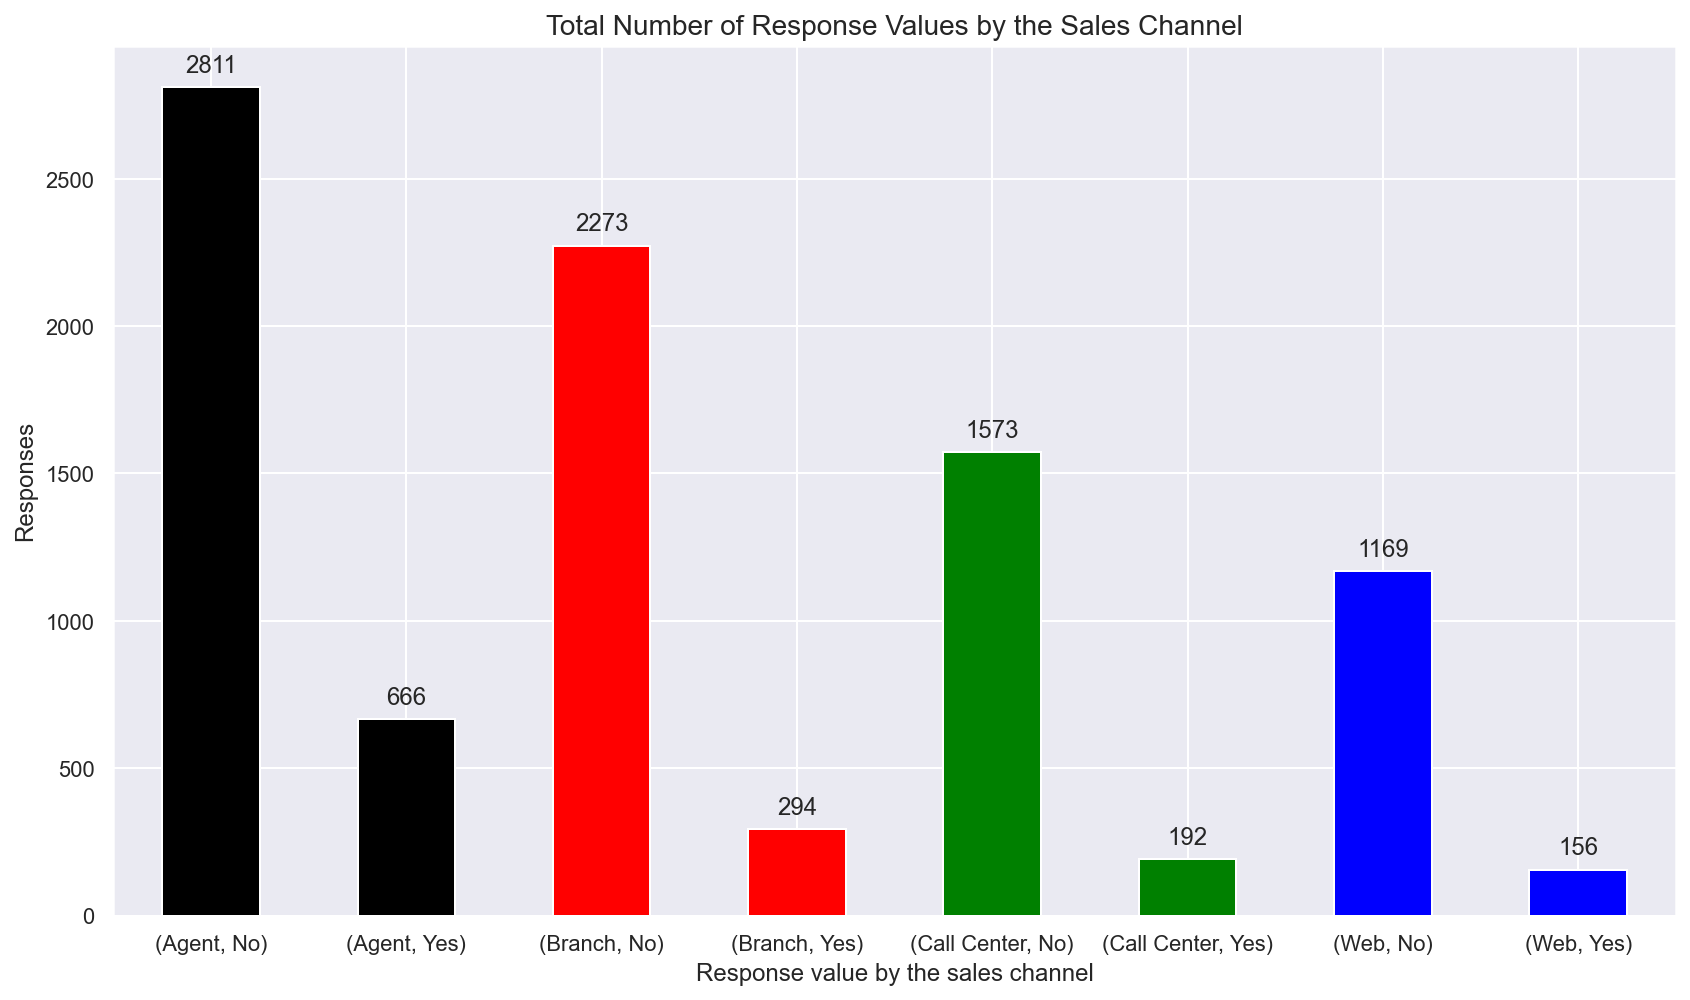

In [80]:
#BarPlot
#Response Rate Values by every Sales Channel. 
#Create data for being plotted
ax = df.groupby(df['sales channel'])['response'].value_counts().plot(kind='bar', color=['black', 'black', 'red','red','green', 'green', 'blue', 'blue'])
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Name the Y axis
ax.set_ylabel('Responses')
#Name the X axis
ax.set_xlabel('Response value by the sales channel')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Total Number of Response Values by the Sales Channel', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Plot the barchart
plt.show()

## Show a plot of the response rate by the total claim amount.

In [121]:
#Table to be displayed
df.groupby(df['response'])['total claim amount'].sum()

response
No     3.381493e+06
Yes    5.834738e+05
Name: total claim amount, dtype: float64

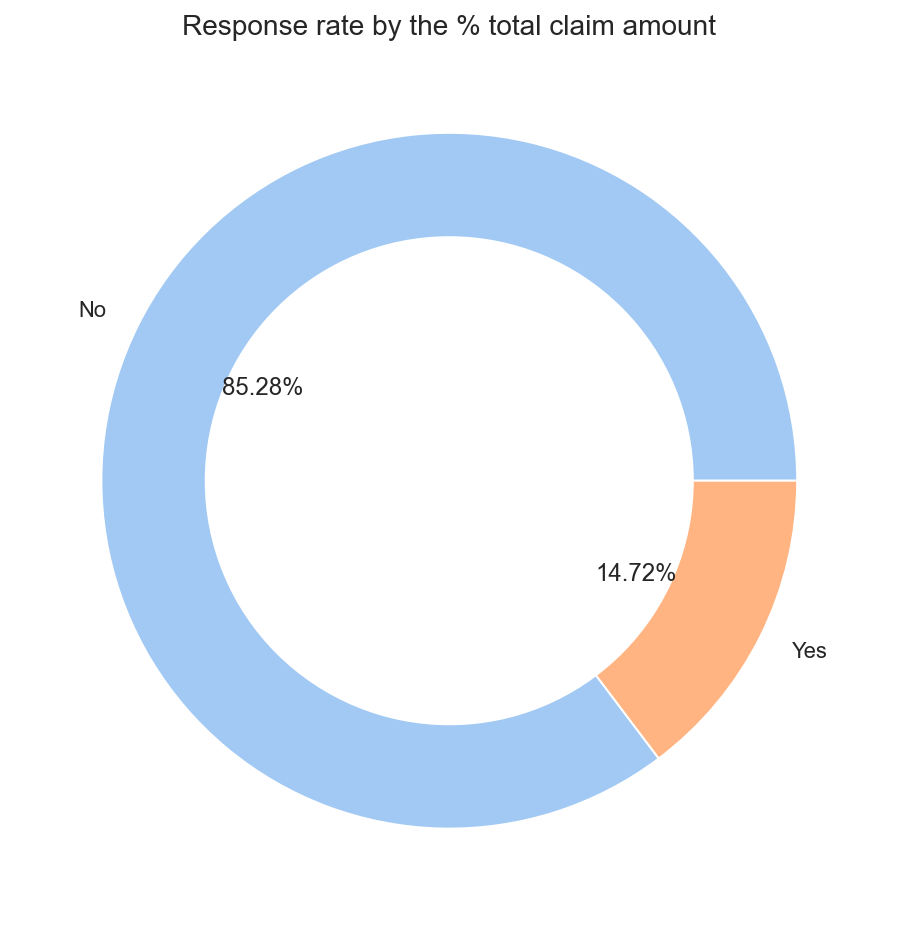

In [123]:
#Pie Chart
#Create Labels
names = ['No', 'Yes']
#Create Pie chart
plt.pie(df.groupby(df['response'])['total claim amount'].sum(), labels=names, autopct='%1.2f%%')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Response rate by the total claim amount %', fontsize=14)
plt.show()

##  Show a plot of the response rate by income.


In [139]:
df['income'].fillna(df['income'].median(), inplace=True)

In [156]:
bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
pd.cut(df['income'], bins)


0       (50000.0, 60000.0]
1                      NaN
2       (40000.0, 50000.0]
3                      NaN
4       (40000.0, 50000.0]
               ...        
9129    (70000.0, 80000.0]
9130                   NaN
9131                   NaN
9132                   NaN
9133                   NaN
Name: income, Length: 9134, dtype: category
Categories (7, interval[int64, right]): [(30000, 40000] < (40000, 50000] < (50000, 60000] < (60000, 70000] < (70000, 80000] < (80000, 90000] < (90000, 100000]]

In [150]:
df['income']

0       56274
1           0
2       48767
3           0
4       43836
        ...  
9129    71941
9130    21604
9131        0
9132    21941
9133        0
Name: income, Length: 9134, dtype: int64

In [131]:
df['income'].min()

0

In [135]:
df['income'].max()

99981

<AxesSubplot:>

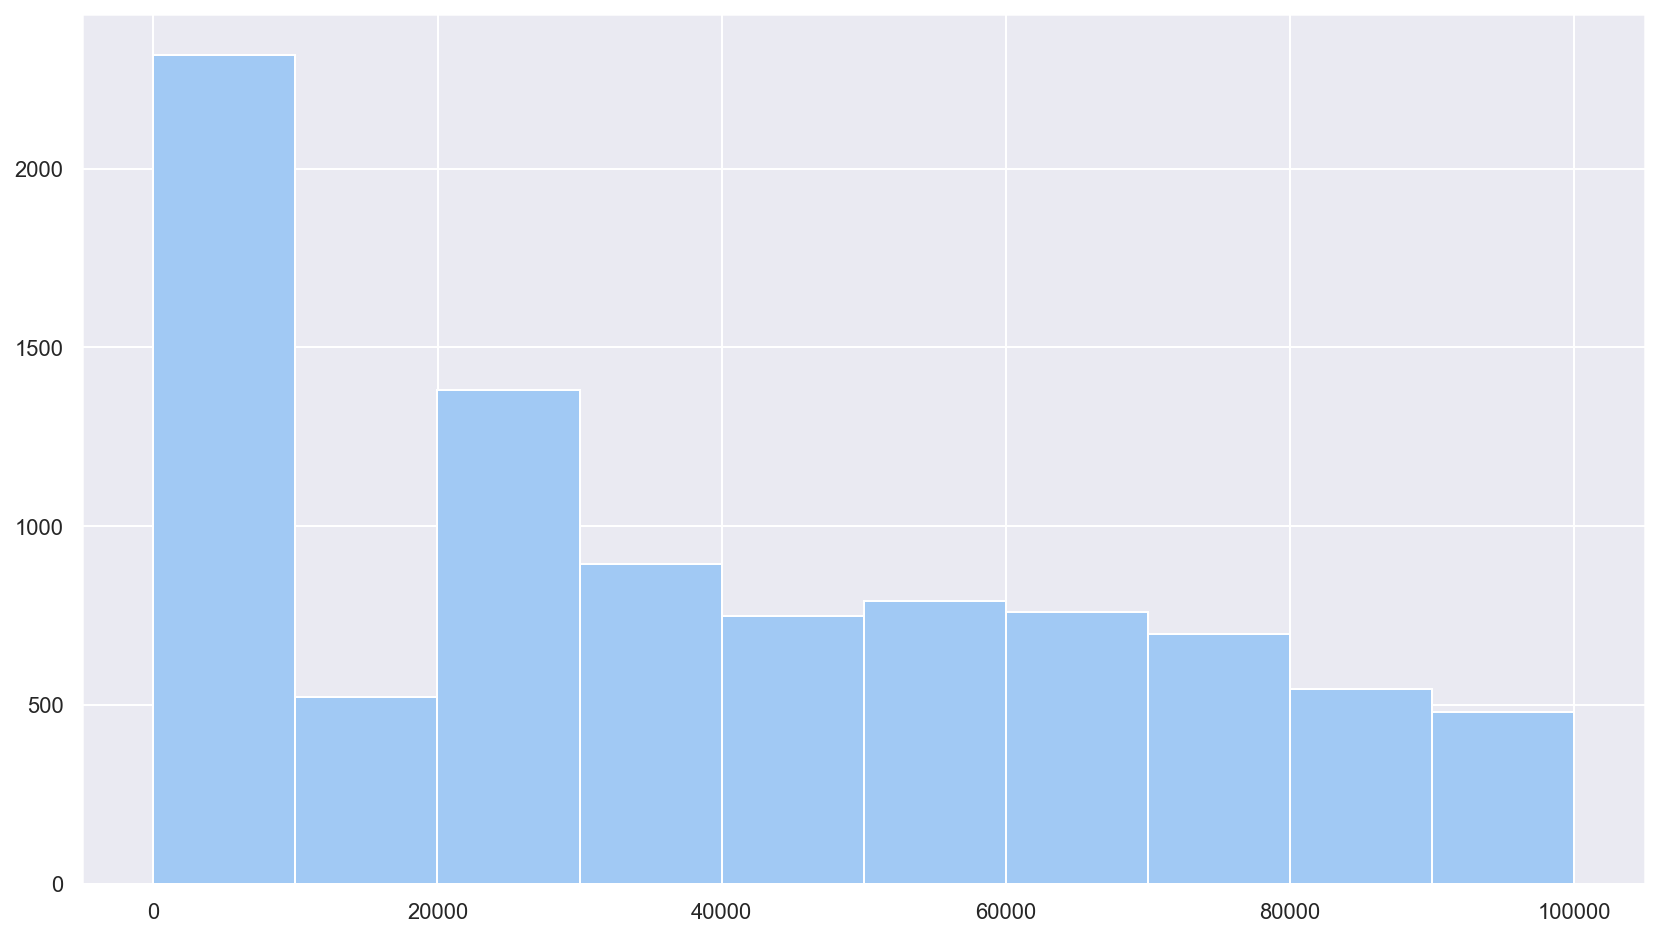

In [132]:
df['income'].hist()